# Datastory Trachea-, bronchiën- en longkanker



# 

In [200]:
# Importeer packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

Trachea, bronchus en longkanker is een van de dodelijkste vormen van kanker, met een hoge mortaliteit en een significante impact op de volksgezondheid. Risicofactoren voor deze vorm van kanker zijn roken, blootstelling aan luchtvervuiling, asbest en andere schadelijke stoffen. Ondanks verbeteringen in de diagnostiek en behandeling, blijft de prognose voor veel patiënten somber, wat benadrukt hoe cruciaal preventieve maatregelen en vroege opsporing zijn.

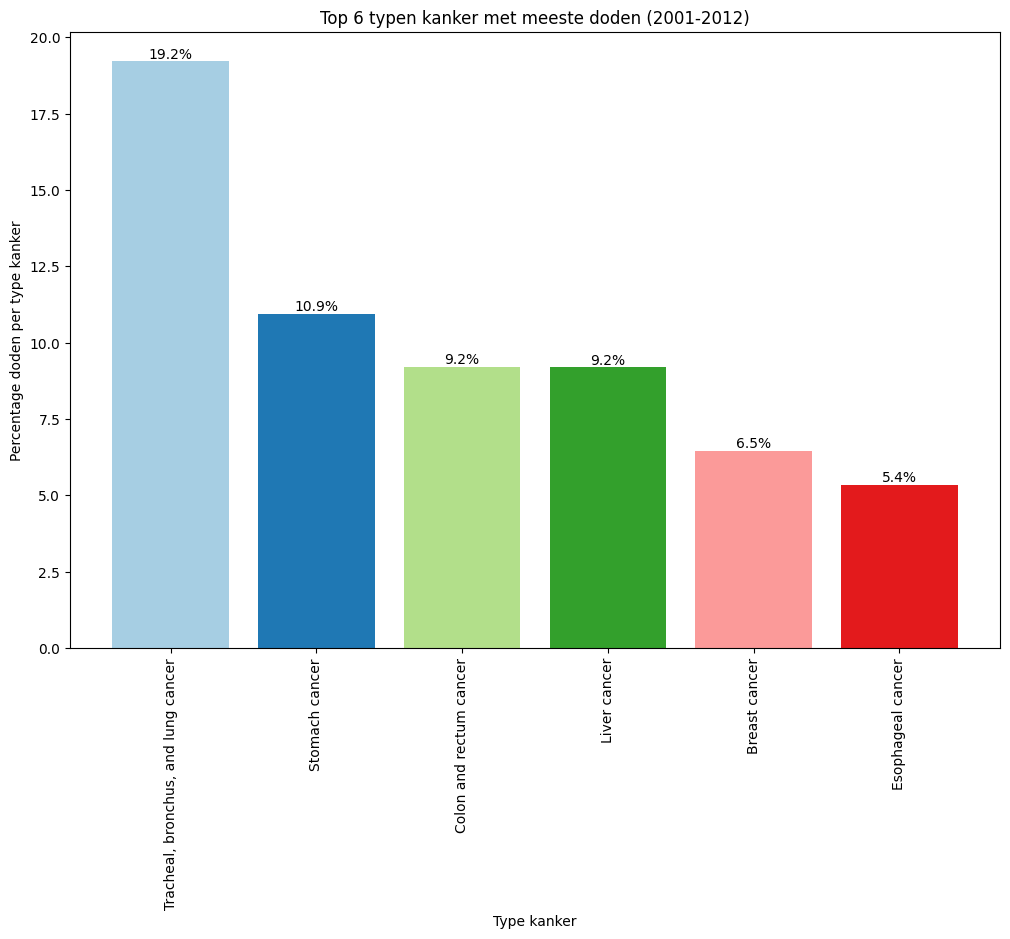

In [201]:
# Laad het CSV-bestand
file_path = 'csv/CancerDeaths.csv'
cancer_data = pd.read_csv(file_path)

# Verwijder eventuele witruimte uit de kolomnamen
cancer_data.columns = cancer_data.columns.str.strip()

# Filter data voor de jaren 2001-2012
filtered_data = cancer_data[(cancer_data['Year'] >= 2001) & (cancer_data['Year'] <= 2012)]

# Selecteer kolommen gerelateerd aan kankertypes (exclusief Land, Code en Jaar kolommen)
cancer_types = cancer_data.columns[3:]

# Sommeer de gevallen voor elk type kanker over de gefilterde jaren
cancer_sums = filtered_data[cancer_types].sum()

# Sorteer de sommen in aflopende volgorde om de meest voorkomende vormen van kanker te krijgen
sorted_cancer_sums = cancer_sums.sort_values(ascending=False)

# Selecteer de top 6 meest voorkomende vormen van kanker
top_6_cancers = sorted_cancer_sums.head(6)

# Bereken het totale aantal kankergevallen voor percentageberekening
total_cancer_cases = cancer_sums.sum()

# Bereken het percentage voor elk van de top 6 kankers
top_6_percentages = (top_6_cancers / total_cancer_cases) * 100

# Plotten van de staafdiagram
plt.figure(figsize=(12, 8))
bars = plt.bar(top_6_cancers.index, top_6_percentages, color=plt.cm.Paired(range(6)))

# Percentages bovenop de staven toevoegen
for bar, percentage in zip(bars, top_6_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Type kanker')
plt.ylabel('Percentage doden per type kanker')
plt.title('Top 6 typen kanker met meeste doden (2001-2012)')
plt.xticks(rotation=90)
plt.show()


In 2016 was met 19 procent van alle kanker-gerelateerde overlijdens TBL-kanker (Trachea, bronchiën en longkanker) de grootste doodsoorzaak onder alle kankersoorten (Safiri et al., 2021). Dit komt ook erg overeen met onze dataset, ookal hebben wij ons gericht op de jaren 2001-2012.

# Perpectief 1: Roken is niet de hoofdoorzaak van TBL-kanker

Het is algemeen bekend dat roken ongezond is, voornamelijk omdat roken kanker zou veroorzaken. Bij het roken van een sigaret wordt de rook via de luchtwegen in de longen geïnhaleerd. Omdat de rook dus in direct contact komt met de luchtwegen en longen wordt er vaak naar roken gewezen als hoofdoorzaak van TBL-kanker. Toch blijkt dat het aantal rokers blijft dalen en het aantal TBL-kankerdoden blijft stijgen. Hoewel roken wel degelijk TBL-kanker kan veroorzaken, denken wij dat roken niet de hoofdoorzaak is.

## Rokers per capita 

Deze grafiek lijkt te laten zien dat in gebieden waar mensen veel roken, vaker TBL-kanker voorkomt. Landen met een groter aantal rokers per capita hebben een hoger aantal TBL-kankergevallen per capita. Toch zijn er voor veel grote landen, grote verschillen. Zo zijn er landen met een hoog aantal rokers per capita en een relatief laag aantal TBL-kankerdoden, zoals Rusland. Ook zijn er landen met een laag aantal rokers per capita, maar een hoog aantal longkanker doden, zoals Amerika. Dit wijst erop dat andere factoren, zoals luchtvervuiling, en toegang tot gezondheidszorg, ook een significante rol kunnen spelen bij het aantal TBL-kankerdoden van een land. We zien hier dus al aanwijzingen van verschillen tussen het aantal rokers en aantal TBL-kanker doden.

In [202]:
# importeer merged_data
df_combined = pd.read_csv("csv/df/combined.csv")

# Creëer een choropleth map
fig = px.choropleth(
    df_combined,
    locations="Country",
    locationmode="country names",
    color="Smokers Per Capita",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Gemiddelde aantal rokers per Capita (2000-2012)"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Rokers<br>Per Capita",
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,    
)
fig.show()


fig_lung = px.choropleth(df_combined,
                         locations='Country',
                         locationmode='country names',
                         color='Lung Cancer Per Capita',
                         hover_name='Country',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Lung Cancer Rates per Capita by Country')

fig_lung.update_layout(
    title_text='TBL-Kanker Cijfers per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="TBL-kanker<br>Per Capita",
    )
)
fig_lung.show()

## Rokers correlatie met TBL-Kanker

De plots hieronder laten zien dat het aantal rokers afneemt, maar dat het aantal TBL-kanker doden wel doorstijgt. Het lijkt hierdoor zelfs een negatieve correlatie te hebben. Dit geldt voor het aantal rokers, en het gemiddeld aantal sigaretten per capita. Dit duidt erop dat roken waarschijnlijk niet de enige oorzaak is van TBL-kanker, maar zoals hierboven te zien is, heeft het wel degelijk een aandeel.

In [203]:
# importeer grouped smokers data
df_grouped = pd.read_csv("csv/df/grouped_smokers_df.csv")

# Creëer het scatter plot 
correlation_coefficient_smoke = df_grouped['LungCancerPerCapita'].corr(df_grouped['SmokersPerCapita'])
fig = px.scatter(df_grouped, x="LungCancerPerCapita", y="SmokersPerCapita", trendline="ols",
                 title='Correlatie tussen TBL-kanker en Rokers per Capita',
                 hover_data=["Year"],
                 labels={
                     "SmokersPerCapita": "Totale Rokers per Capita",
                     "LungCancerPerCapita": "TBL-Kanker Doden per Capita",
                     "Year":"Jaar"
                 })

# Voeg correlatie to als annottatie
fig.add_annotation(
    x=max(df_grouped['LungCancerPerCapita']), 
    y=max(df_grouped['SmokersPerCapita']), 
    text=f'Correlation Coefficient: {correlation_coefficient_smoke:.2f}',
    showarrow=False,
    font=dict(size=12, color="black"),
    xanchor='right',
    yanchor='bottom'
)

fig.update_layout(
    height = 600
)
fig.show()


Het zou dus kunnen wijzen op andere oorzaken voor TBL-kanker. Sigaretten bevatten vele kankerverwekkende stoffen. In de rook van sigaretten zitten meer dan 60 verschillende carcinogenen, waaronder in kleine aantallen een van de sterkste carcinogeen groepen, polycyclic aromatic hydrocarbons (PAH). PAH’s zijn producten van onvolledige verbranding en komen ook voor in uitlaatgassen van onder andere auto’s (Hecht, 2006). Uit de literatuur volgt dus ook dat roken wel zou kunnen leiden tot TBL-kanker. Maar het is onwaarschijnlijk dat dit de hoofdoorzaak is.

# Perspectief 2: Fijnstof

TBL-kanker heeft meerdere oorzaken dan alleen roken, niet-rokers overlijden nota bene ook aan TBL-kanker. Een mogelijke oorzaak van TBL-kanker kan daarom niet slechts het roken zelf zijn, maar wellicht bepaalde stoffen in de sigarettenrook. Deze stoffen komen niet alleen vrij bij het roken, maar bij de onvolledige verbranding van stoffen in het algemeen, denk bijvoorbeeld aan auto-uitlaatgassen. Uitstoot in de lucht komt ook in direct contact met de longen en luchtwegen bij het ademen. 



## Uitstoot en TBL-Kanker

In de periode van 2001 tot 2012 zijn de algehele emissies flink toegenomen, zoals te zien in onderstaande grafiek. Tegelijkertijd is het aantal TBL-kankerdoden in een zelfde soort stijgende lijn toegenomen. Dit zou kunnen duiden op een eventueel verband tussen uitstoot en TBL-kanker.

Wel moet genoteerd worden dat aangezien de wereld populatie toeneemt, het totale aantal emissies en TBL-kankerdoden waarschijnlijk ook zal stijgen. Daarom zal later in het datastory worden laten zien dat deze stijging ook hetzelfde is als we per capita gaan bekijken. Toch is het opvallend dat percentueel de stijging in totale aantallen ook hetzelfde lijkt. Zo zien we dat in de periode 2004-2008 er een stijging van het aantal TBL-doden was van ongeveer 115%. Voor het aantal emissies was deze stijging in dezelfde periode 114%. De stijgingen lijken dus parallel aan elkaar te lopen.

In [204]:
# importeer gecleande dataframes 
emissions_cancer_merged = pd.read_csv("csv/df/emissions_cancer_merged.csv")

# Creëer subplot 
fig = make_subplots(rows=1, cols=2, subplot_titles=('Tracheale, bronchus- en longkanker per jaar', 'Totale Emissies Per Jaar Wereldwijd'))

fig.add_trace(go.Scatter(x=emissions_cancer_merged['Year'], y=emissions_cancer_merged["Tracheal, bronchus, and lung cancer "],
                         mode='lines', name='Tracheale, bronchus- en longkanker'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=emissions_cancer_merged['Year'], y=emissions_cancer_merged['Total'],
                         mode='lines', name='Totale Emissies'),
              row=1, col=2)

fig.update_layout(
    title_text='Vergelijking van Tracheale, bronchus- en longkanker en Totale Emissies per jaar',
    showlegend=False
)

fig.update_xaxes(title_text='Jaar', row=1, col=1)
fig.update_yaxes(title_text='Tracheale, bronchus- en longkanker', row=1, col=1)
fig.update_xaxes(title_text='Jaar', row=1, col=2)
fig.update_yaxes(title_text='Totale Emissies', row=1, col=2)

fig.show()

## Wereld visualisatie

De luchtkwaliteit van een land hangt deels af van de lokale emissies die er in het land per jaar vrijkomen. De grafieken hieronder proberen te laten zien dat gebieden waar de emissies het hoogst zijn, er een hogere prevalentie van TBL-kankerdoden is. Er is wel een lichte overeenkomst te zien tussen de landen met een hogere prevalentie van TBL-kankerdoden en emissies. Dit kan erop duiden dat het fijnstof, wat vrijkomt bij emissies, een invloed heeft op het aantal TBL-doden.

In [205]:
# importeer gecleande datasets

df_combined = pd.read_csv("csv/df/combined.csv")

fig_lung = px.choropleth(df_combined,
                         locations='Country',
                         locationmode='country names',
                         color='Lung Cancer Per Capita',
                         hover_name='Country',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Lung Cancer Rates per Capita by Country')

fig_lung.update_layout(
    title_text='TBL-Kanker Cijfers per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="TBL-kanker<br>Per Capita",
    )
)

fig_emissions = px.choropleth(df_combined,
                              locations='Country',
                              locationmode='country names',
                              color='Emissions Per Capita',
                              hover_name='Country',
                              color_continuous_scale=px.colors.sequential.Plasma,
                              title='Emissions per Capita by Country'
                              )

fig_emissions.update_layout(
    title_text='Emissies per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="Emissies<br>Per Capita",
    )
)

fig_lung.show()
fig_emissions.show()

Toch is de overeenkomst niet dusdanig groot. Dit kan mogelijk komen doordat landen met een hogere uitstoot, een hogere economische positie hebben. Dit zou mogelijk kunnen komen doordat hogere welvaart vaak betere gezondheidszorg biedt. De dataset zegt namelijk niks over het aantal gevallen van TBL-kanker, alleen overlijdensaantallen.

## India en Amerika

In de grafiek hieronder zijn twee duidelijke grafieken gemaakt, hierin is goed te zien dat het aantal longkanker gevallen flink stijgt als de emissies per capita ook omhoog gaan en vice versa. Om te visualiseren dat er op landelijke niveau overeenkomsten te zien zijn, hebben we twee grote spelers in de wereld economie gekozen die allebei in een andere fase van ontwikkeling zitten.

In Amerika is de afgelopen periode een dalende trend te zien in de emissies. Wat opvalt is dat het aantal doden door TBL-kanker ook daalt. In India daarentegen, waar de emissies stijgen, stijgt het aantal TBL-kankerdoden. Dit suggereert dat emissies mogelijk bijdragen aan het aantal TBL-kankerdoden.

In [206]:
# importeer dataframe
df_combined = pd.read_csv("csv/df/combined.csv")

def plot_country_data(df, countries):
    fig = make_subplots(rows=1, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}]],
                        subplot_titles=(countries[0], countries[1]))

    for i, country in enumerate(countries):
        df_country = df[df['Country'] == country]
        fig.add_trace(
            go.Scatter(x=df_country['Year'], y=df_country['Lung Cancer Per Capita'], name=f"TBL-Kanker Per Capita - {country}"),
            row=1, col=i+1, secondary_y=False,
        )

        fig.add_trace(
            go.Scatter(x=df_country['Year'], y=df_country['Emissions Per Capita'], name=f"Emissies Per Capita - {country}"),
            row=1, col=i+1, secondary_y=True,
        )

        fig.update_yaxes(title_text="<b>TBL-Kanker Per Capita", row=1, col=i+1, secondary_y=False)
        fig.update_yaxes(title_text="<b>Emissies Per Capita", row=1, col=i+1, secondary_y=True)

    fig.update_xaxes(title_text="Jaar", row=1, col=1)
    fig.update_xaxes(title_text="Jaar", row=1, col=2)
    fig.update_layout(
        title_text="Vergelijking emissies en TBL-kanker voor USA en India",
        height=600,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        )
    )


    fig.show()

plot_country_data(df_combined, ['USA', 'India'])

Een onderzoek van Swanton et al. (2016) ondersteund deze bevinding en vertelt dat wanneer een land in emissies daalt, er ook een daling van longkanker doden lijkt plaats te vinden. Ze vertellen dat dit komt doordat de luchtkwaliteit verbeterd, waardoor er minder fijnstof in de lucht is en er minder aanslag is op de longen van omwonende.

## Correlatie plot

Hieronder staat een plot dat de correlatie laat zien tussen TBL-kanker en emissies per capita.


Er blijkt dan ook een redelijke correlatie te zijn tussen het aantal TBL-kankerdoden per capita en de landelijke emissies per capita. Dit duidt dus er dus op dat er een grote kans is dat de fijnstof die vrijkomt bij emissies, een invloed heeft op het aantal TBL-kankerdoden.

In [207]:
# importeer grouped df
df_grouped = pd.read_csv("csv/df/grouped_df.csv")

# Create the scatter plot with trendline using plotly
correlation_coefficient = df_grouped['EmissionsPerCapita'].corr(df_grouped['LungCancerPerCapita'])
fig = px.scatter(df_grouped, x="EmissionsPerCapita", y="LungCancerPerCapita", trendline="ols",
                 title='Correlatie tussen TBL-kanker en Emissies per Capita (MtCO2 per persoon)',
                 hover_data=["Year"],
                 labels={
                     "EmissionsPerCapita": "Totale Emissies per Capita (MtCO2 per persoon)",
                     "LungCancerPerCapita": "TBL-Kanker Doden per Capita",
                     "Year":"Jaar"
                 })

# Add correlation coefficient as annotation
fig.add_annotation(
    x=max(df_grouped['EmissionsPerCapita']),  # Position the annotation at the far right of the x-axis
    y=min(df_grouped['LungCancerPerCapita']),  # Position the annotation at the bottom of the y-axis
    text=f'Correlation Coefficient: {correlation_coefficient:.2f}',
    showarrow=False,
    font=dict(size=12, color="black"),
    xanchor='right',
    yanchor='bottom'
)

fig.update_layout(
    height = 600
)

Uit de visualisaties komt naar voren dat er een grote kans is dat de emissies de kans op TBL-kanker erg vergroot. Volgens Brandhorst (2022) is een correlatie rond de 0.5 een erg sterke correlatie, dus onze variabelen zijn in dit geval sterk gecorreleerd.
Luchtvervuiling en met name fijnstof, wat veroorzaakt wordt door onvolledige verbranding van fossiele brandstoffen (Cohen & Pope, 1995), is een grote veroorzaker van onder andere longkanker. De literatuur komt in dit geval overeen met de uitkomsten van onze visualisaties. Vooral de uitstoot van fijnstof en stikstofoxiden veroorzaken de kans op gezondheidsproblemen zoals onder andere longkanker en astma (Geelen et al., 2023). 

# In conclusie

TBL-kanker is een aandoening die tot op de dag van vandaag veel schade aanricht. Kijkend naar uitstoot en roken als mogelijke oorzaken van TBL-kanker laat zien dat roken en uitstoot de prevalentie van TBL-kanker mogelijk positief beïnvloeden. Dit dataverhaal benadrukt dat het van essentieel belang is om door te gaan met streven naar een rookvrije generatie, maar dat er tegelijkertijd ook op andere risicofactoren voor TBL-kanker zoals uitstoot gelet moet worden voor een gezondere en hopelijk TBL-kankervrije toekomst. 

## Discussie

Als we meer tijd hadden voor dit project waren er nog enkele tekortkomingen die we eventueel hadden kunnen aanpakken. Allereerst pakken we een periode van 11 jaar omdat we geen datasets konden vinden met een grotere overlap van jaren. Dit is mogelijk een te korte periode om concrete uitspraken te doen over eventuele verbanden aangezien een ziekte als kanker meestal niet van de ene op de andere dag ontwikkelt, maar meestal pas na een aantal jaar blootstelling van schadelijke stoffen. Ook bevat onze dataset alleen informatie over de aantallen kankerdoden per type kanker per jaar, maar verder geen data over hoeveel mensen gediagnosticeerd werden, of de leeftijd waarop men overlijdt of geslacht etc. Daarnaast zijn er verschillende factoren die de stijging van TBL-kanker ook kunnen hebben beïnvloed zoals veranderingen in dieet of de steeds ouder wordende populatie. 

# Referenties 

>Brandhorst, J. W. B. (2022c, december 19). 4. Resultaten correlatie- en regressieanalyses. Centraal Bureau Voor de Statistiek. https://www.cbs.nl/nl-nl/longread/aanvullende-statistische-diensten/2022/jaarlijkse-monitor-onderwijsachterstandenindicator-2017-2022/4-resultaten-correlatie-en-regressieanalyses 
>
> Cohen, A. J., & Pope 3rd, C. A. (1995). Lung cancer and air pollution. _Environmental health perspectives, 103_(suppl 8), 219-224.
>
> Geelen, L. M. J., Bogers, R. P., Elberse, J. E., Houthijs, D., Montforts, M. H. M. M., Schuijff, M., ... & Wijten, J. H. J. (2023). De bijdrage van Tata Steel Nederland aan de gezondheidsrisico's van omwonenden en de kwaliteit van hun leefomgeving.
>
>Hecht, S. S. (2006). Cigarette smoking: cancer risks, carcinogens, and mechanisms. Langenbeck's archives of surgery, 391, 603-613.
>
> Safiri, S., Sohrabi, M. R., Carson-Chahhoud, K., Bettampadi, D., Taghizadieh, A., Almasi-Hashiani, A., ... & Kolahi, A. A. (2021). Burden of tracheal, bronchus, and lung cancer and its attributable risk factors in 204 countries and territories, 1990 to 2019. _Journal of Thoracic Oncology, 16_(6), 945-959.
>
>Swanton, C., Boffetta, P., Peston, R., & Soria, J. (2016). Environmental emissions, public health and lung cancer risk. Annals of Oncology, 27(2), 211–212.
